In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')
#sns.set(rc={"figure.dpi":1200})
sns.set_context('notebook')
sns.set_style("ticks")
mpl.style.use('default')
mpl.rcParams['axes.linewidth'] = 7 #set the value globally
mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 7
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 7
mpl.rcParams['ytick.major.size'] = 20
mpl.rcParams['ytick.major.width'] = 7
mpl.rcParams['ytick.labelsize'] = 50
mpl.rcParams['xtick.labelsize'] = 50
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 7
mpl.rcParams['font.size'] = 55
mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'
mpl.rcParams['mathtext.it'] = 'Arial'
mpl.rcParams['mathtext.bf'] = 'Arial:bold'

###IMPORT DATAFRAME###
df = pd.read_csv('OSMOTIC_PERTURBATIONS_MASTER_HIF1A_CITED2_CONCATENATED.csv')
###Drop any rows where 'protein' is 'HIF1A'####
#df = df[df['protein'] != 'CITED2']###
#Change 'WT' to 'WT_HIF1A' where 'protein' is 'HIF1A'
df.loc[(df['protein'] == 'HIF1A') & (df['mut name'] == 'WT'), 'mut name'] = 'WT_HIF1A'

# Change 'WT' to 'WT_CITED2' where 'protein' is 'CITED2'
df.loc[(df['protein'] == 'CITED2') & (df['mut name'] == 'WT'), 'mut name'] = 'WT_CITED2'

df = df[df['D/A_corr_before']<6]
df = df[df['area_before']<650]
df = df[df['D_before']>500]
df = df[df['directA_before']<10000]
df = df[df['directA_before']>3162]
df = df[(df['d_directA']<1200)]
# Group by 'ID' and get 'well' value counts for each group
grouped_well_counts = df.groupby('IDR')['well'].value_counts()

# Convert the Series to a DataFrame for easier filtering
grouped_well_counts = grouped_well_counts.reset_index(name='count')

# Identify 'ID' and 'well' pairs with a count of 30 or more
valid_wells = grouped_well_counts[grouped_well_counts['count'] >= 30]

# Merge the valid_wells DataFrame back with the original df to filter it
# Only keep rows from df that have 'ID' and 'well' combinations appearing in valid_wells
df_filtered = df.merge(valid_wells[['IDR', 'well']], on=['IDR', 'well'])

# The df_filtered now contains only the rows from the original df where the 'well' count per 'ID' is 30 or more
df=df_filtered
# TableS3 = TableS3[TableS3['D/A_before']<6]
# TableS3 = TableS3[TableS3['Area']<650]
# TableS3 = TableS3[TableS3['ch1']>3000]
# TableS3 = TableS3[TableS3['ch3']<10000]
# sliced = TableS3[(TableS3.construct==prot)&(abs(TableS3['ch7']-TableS3['ch3'])<2000)]

In [19]:
unique_values = df['mut name'].unique()
unique_values

array(['WT_CITED2', 'RK>Amut20to39', 'MA>W', 'GS24', 'WT_HIF1A', 'RK>D',
       'L>F', 'NQ>W', 'RK>E', 'FML>A', 'L>W'], dtype=object)

In [20]:
print(df.columns)

Index(['Unnamed: 0', 'IDR', 'date', 'condition', 'well', 'area_before',
       'D_before', 'A_before', 'D_before std', 'A_before std', 'D/A before',
       'directA_before', 'area_after', 'D_after', 'A_after', 'D_after std',
       'A_after std', 'D/A after', 'directA_after', 'log directA_before',
       'log directA_after', 'A_corr_before', 'D/A_corr_before', 'A_corr_after',
       'D/A_corr_after', 'Ef_before', 'Ef_after', 'delta Ef', 'd_directA',
       'protein', 'mut name'],
      dtype='object')


In [22]:
# Calculate median 'delta Ef' for each 'well' of each 'condition' for each 'mut name'
df_median = df.groupby(['mut name', 'condition', 'well'])['delta Ef'].median().reset_index(name='median delta Ef')

# Calculate standard deviation of 'median delta Ef' for each 'condition' for each 'mut name'
df_std = df_median.groupby(['mut name', 'condition'])['median delta Ef'].std().reset_index(name='std dev delta Ef')

# Merge df_median and df_std
df_final = pd.merge(df_median, df_std, on=['mut name', 'condition'], how='left')

# Calculate average 'median delta Ef' for each 'condition' for each 'mut name'
df_mean = df_final.groupby(['mut name', 'condition'])['median delta Ef'].mean().reset_index(name='average median delta Ef')

# Calculate standard deviation of 'average median delta Ef' for each 'condition' for each 'mut name'
df_std = df_final.groupby(['mut name', 'condition'])['median delta Ef'].std().reset_index(name='std dev average median delta Ef')

# Merge df_mean and df_std
df_final_avg = pd.merge(df_mean, df_std, on=['mut name', 'condition'], how='left')

# Print the final DataFrame
print(df_final_avg)


         mut name  condition  average median delta Ef  \
0           FML>A        300                -0.004698   
1           FML>A        750                 0.008240   
2            GS24        100                -0.001024   
3            GS24        300                -0.001496   
4            GS24        750                 0.020948   
5             L>F        100                 0.014795   
6             L>F        300                -0.003635   
7             L>F        750                -0.025949   
8             L>W        300                 0.000069   
9             L>W        750                -0.048538   
10           MA>W        100                 0.002056   
11           MA>W        300                -0.001687   
12           MA>W        750                -0.004767   
13           NQ>W        750                -0.007861   
14  RK>Amut20to39        100                 0.019484   
15  RK>Amut20to39        300                -0.001419   
16  RK>Amut20to39        750   

In [32]:
import pandas as pd
import scipy.stats as stats

# Define the desired order for 'mut name'
mut_name_order = ['NQ>W', 'MA>W', 'WT_HIF1A','WT_CITED2', 'RK>E', 'RK>D', 'GS24']

# Filter the dataframe for the specified conditions
conditions = [100, 300, 750]
df_subset = df[df['condition'].isin(conditions)]
condition_colors = {100: 'green', 300: 'orange', 750: 'blue'}

def compute_p_value(mutant, df_subset):
    # Prepare data for each condition
    condition_100_data = df_median[(df_median['mut name'] == mutant) & (df_median['condition'] == 100)]['median delta Ef']
    condition_300_data = df_median[(df_median['mut name'] == mutant) & (df_median['condition'] == 300)]['median delta Ef']
    condition_750_data = df_median[(df_median['mut name'] == mutant) & (df_median['condition'] == 750)]['median delta Ef']

    # Find the minimum length for fair comparison
    min_length_100_300 = min(len(condition_100_data), len(condition_300_data))
    min_length_750_300 = min(len(condition_750_data), len(condition_300_data))

    # Perform t-tests
    _, p_val_100_300 = stats.ttest_rel(condition_100_data[:min_length_100_300], condition_300_data[:min_length_100_300])
    _, p_val_750_300 = stats.ttest_rel(condition_750_data[:min_length_750_300], condition_300_data[:min_length_750_300])
    return (p_val_100_300, p_val_750_300)

def is_significant(p_val):
    if p_val < 0.0001:
        return '***'  # Triple asterisk for p < 0.0001
    elif p_val < 0.001:
        return '**'   # Double asterisk for p < 0.001
    elif p_val < 0.01:
        return '*'    # Single asterisk for p < 0.01
    else:
        return 'NaN'     # No asterisk for p >= 0.01

# Create a new DataFrame to store the results
results = []

for mutant in mut_name_order:
    p_val_100_300, p_val_750_300 = compute_p_value(mutant, df_subset)
    results.append({
        'mut name': mutant,
        'p-value 100 vs 300': p_val_100_300,
        'asterisk_100': is_significant(p_val_100_300),
        'p-value 750 vs 300': p_val_750_300,
        'asterisk_750': is_significant(p_val_750_300)
    })
results_df = pd.DataFrame(results)
results_df

,mut name,p-value 100 vs 300,asterisk_100,p-value 750 vs 300,asterisk_750
0,NQ>W,NaN,NaN,NaN,NaN
1,MA>W,1.585835e-01,NaN,0.545973,NaN
2,WT_HIF1A,5.331871e-02,NaN,0.004317,*
3,WT_CITED2,8.944857e-07,***,0.000084,***
4,RK>E,1.379019e-03,*,0.719086,NaN
5,RK>D,2.715371e-03,*,0.014340,NaN
6,GS24,8.274512e-01,NaN,0.001443,*


In [33]:
print(results_df.columns)

Index(['mut name', 'p-value 100 vs 300', 'asterisk_100', 'p-value 750 vs 300',
       'asterisk_750'],
      dtype='object')


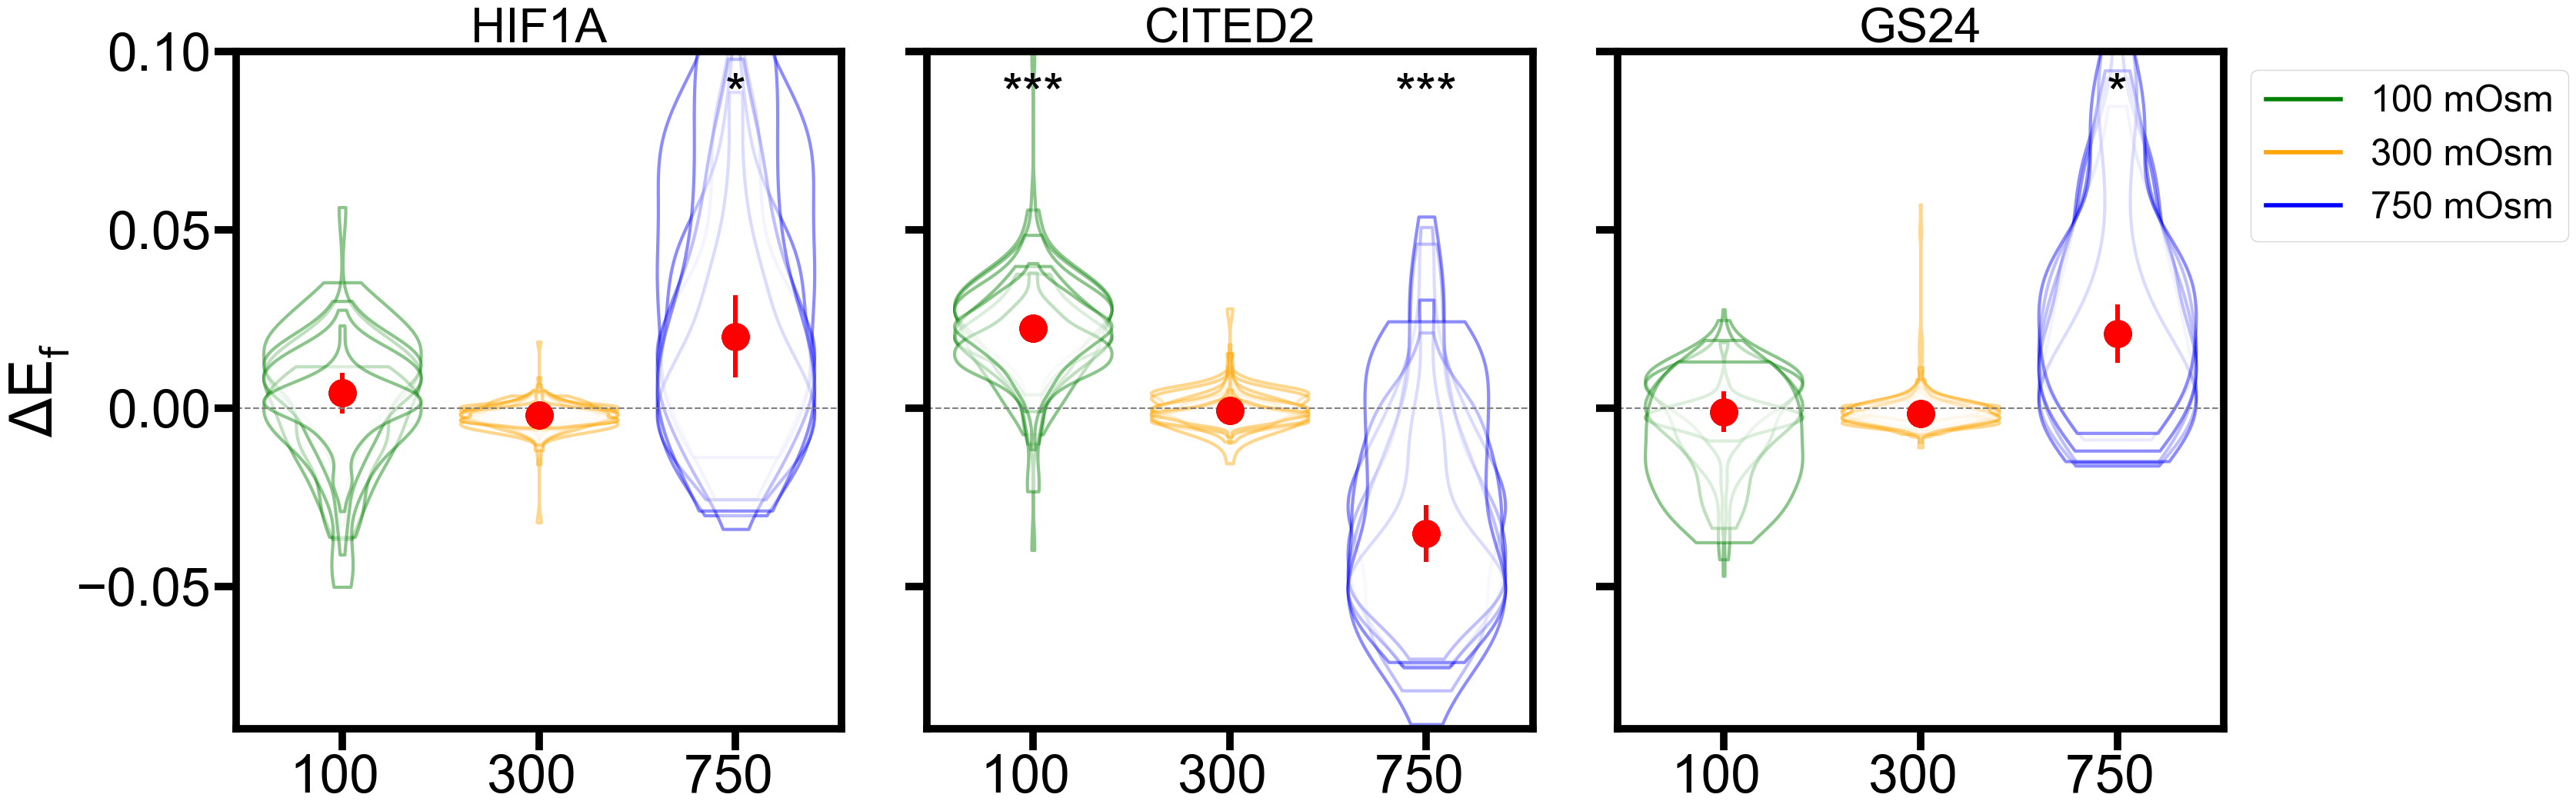

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the desired order for 'mut name'
mut_name_order = ['WT_HIF1A', 'WT_CITED2', 'GS24']

# Assume 'df' is your initial DataFrame containing all the data
filtered_df = df[df['condition'].isin([100, 300, 750])]

condition_colors = {100: 'green', 300: 'orange', 750: 'blue'}

def plot_data(df_subset, results_df, filename):
    conditions = df_subset['condition'].unique()
    wells = df_subset['well'].unique()

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(35, 12), sharey=True)
    # Initialize max_delta_Ef to store the max delta Ef value for each mut_name
    max_delta_Ef = {condition: -np.inf for condition in conditions}  # Set default max values

    for idx, mut_name in enumerate(mut_name_order):
        ax = axes[idx]
        
        

        for j, condition in enumerate(conditions):
            for k, well in enumerate(wells):
                condition_data = df_subset[(df_subset['mut name'] == mut_name) & 
                                           (df_subset['condition'] == condition) & 
                                           (df_subset['well'] == well)]['delta Ef']

                if not condition_data.empty:
                    # Update the max_delta_Ef for the condition if the current data has a higher max value
                    max_delta_Ef[condition] = max(max_delta_Ef[condition], condition_data.max())

                    vp = ax.violinplot(condition_data, positions=[j], widths=0.8,
                                       showmeans=False, showextrema=False, showmedians=False)
                    for pc in vp['bodies']:
                        pc.set_facecolor('white')
                        pc.set_edgecolor(condition_colors[condition])
                        pc.set_alpha(0.45)
                        pc.set_linewidth(3)
                    # Presumed plotting of other statistics like median delta Ef goes here...
                    avg_median_delta_Ef = df_final_avg.loc[(df_final_avg['mut name'] == mut_name) & 
                                                           (df_final_avg['condition'] == condition), 
                                                           'average median delta Ef'].values[0]
                    std_dev_avg_median_delta_Ef = df_final_avg.loc[(df_final_avg['mut name'] == mut_name) & 
                                                                   (df_final_avg['condition'] == condition), 
                                                                   'std dev average median delta Ef'].values[0]

                    if not pd.isna(std_dev_avg_median_delta_Ef):
                        ax.errorbar(j, avg_median_delta_Ef, 
                                    yerr=std_dev_avg_median_delta_Ef, fmt='o', color='red', zorder=2,markersize=25,linewidth=4)

        # Plot asterisks for conditions 100 and 750, if they are significant
        for j, condition in enumerate(conditions):
            if condition in [100, 750] and max_delta_Ef[condition] != -np.inf:
                asterisk_column = f'asterisk_{condition}'
                if asterisk_column in results_df.columns:
                    asterisk = results_df.loc[results_df['mut name'] == mut_name, asterisk_column].values[0]
                    if asterisk in ['*', '**', '***']:  # Check if the value is one of the expected symbols
                # Define different y-offsets based on the number of asterisks to avoid overlap and ensure visibility
                        if asterisk == '*':
                            y_pos = 0.08  # Single asterisk position
                        elif asterisk == '**':
                            y_pos =  0.08 # Double asterisks slightly higher
                        else:
                            y_pos =  0.08  # Triple asterisks at the highest position
                        ax.text(j, y_pos, asterisk, color='black', ha='center', va='bottom', fontsize=50)

        ax.set_xticks(range(len(conditions)))
        ax.set_xticklabels([f'{c} ' for c in conditions], rotation=360)
        ax.axhline(0, color='gray', linestyle='--')
        mut_name = mut_name.replace('WT_', '')
        ax.set_title(mut_name, fontsize=45)
    axes[0].set_ylabel('$\Delta$E$_{f}$')
    legend_artists = [plt.Line2D([0], [0], color=color, lw=4) for color in condition_colors.values()]
    axes[-1].legend(legend_artists, [f'{c} mOsm' for c in conditions], fontsize=35, bbox_to_anchor=(1.6,1))

    plt.ylim(-.09, .10)
    plt.tight_layout()
    plt.savefig("osmotic_HIF1A.svg",dpi=1200)
    plt.show()
    # Hide unused subplots

# Example call to the function
# Ensure both 'filtered_df' and 'results_df' are correctly prepared
plot_data(filtered_df, results_df, "osmo_results")


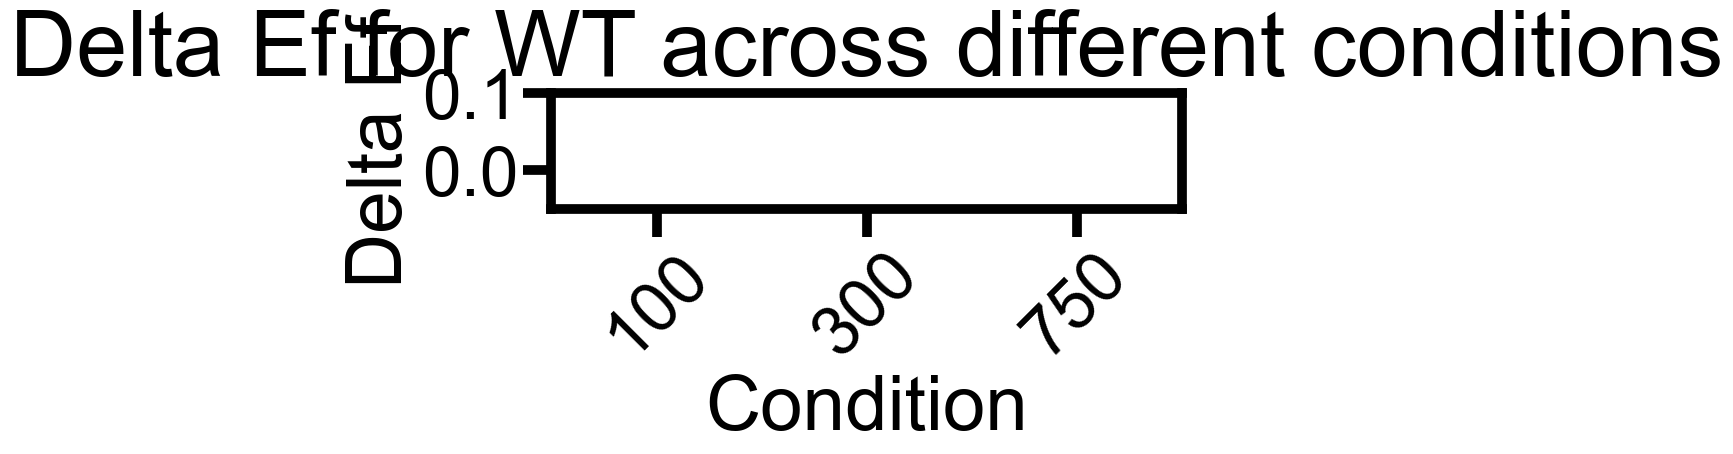

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
# Filter the dataframe for 'mut name' == 'WT'
df_wt = df[df['mut name'] == 'GS24']

# Create the violin plots
plt.figure(figsize=(10, 6)) # You can adjust the figure size as needed
sns.violinplot(x='condition', y='Ef_before', data=df_wt)

plt.title('Delta Ef for WT across different conditions') # Add a title to the plot
plt.xlabel('Condition') # Label for the x-axis
plt.ylabel('Delta Ef') # Label for the y-axis
plt.xticks(rotation=45) # Rotate x-axis labels if necessary
plt.tight_layout() # Adjust layout to not cut off labels
plt.ylim(-.05,.10)
plt.show()

In [36]:
def calculate_counts(df):
    # Group by both 'mut name' and 'condition' and count the unique wells
    counts = df.groupby(['mut name', 'condition','IDR'])['well'].nunique().reset_index(name='Well Count')
    
    return counts

# Example usage:
counts_df = calculate_counts(df)
print(counts_df)


         mut name  condition  IDR  Well Count
0           FML>A        300    7           1
1           FML>A        750    7           1
2            GS24        100   24           5
3            GS24        300   24           6
4            GS24        750   24           6
5             L>F        100    8           5
6             L>F        300    8           7
7             L>F        750    8           4
8             L>W        300    9           1
9             L>W        750    9           1
10           MA>W        100    2           4
11           MA>W        300    2           6
12           MA>W        750    2           5
13           NQ>W        750    1           2
14  RK>Amut20to39        100   12           4
15  RK>Amut20to39        300   12           5
16  RK>Amut20to39        750   12           7
17           RK>D        100    5           5
18           RK>D        300    5           6
19           RK>D        750    5           3
20           RK>E        100    4 

In [37]:
# Filter df_final_avg for 'condition' 750 and 100
df_750 = df_final_avg[df_final_avg['condition'] == 750]
df_100 = df_final_avg[df_final_avg['condition'] == 100]

# Set 'mut name' as the index for easy subtraction
df_750.set_index('mut name', inplace=True)
df_100.set_index('mut name', inplace=True)

# Calculate the absolute difference in 'average median delta Ef' between 'condition' 750 and 100 for each 'mut name'
df_diff = (df_750['average median delta Ef'] - df_100['average median delta Ef']).abs()

# Calculate the propagated standard error
df_error = (df_750['std dev average median delta Ef']**2 + df_100['std dev average median delta Ef']**2)**0.5

# Create the sensitivity DataFrame
sensitivity = pd.DataFrame({'absolute difference': df_diff, 'propagated_SE': df_error})

# Reset the index
sensitivity.reset_index(inplace=True)

# Print the sensitivity DataFrame
print(sensitivity)


         mut name  absolute difference  propagated_SE
0           FML>A                  NaN            NaN
1            GS24             0.021972       0.010003
2             L>F             0.040743       0.010729
3             L>W                  NaN            NaN
4            MA>W             0.006823       0.010900
5            NQ>W                  NaN            NaN
6   RK>Amut20to39             0.043026       0.009719
7            RK>D             0.012217       0.007469
8            RK>E             0.028681       0.028139
9       WT_CITED2             0.057625       0.008829
10       WT_HIF1A             0.015866       0.012860
